## Assignment 4

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for X and/or Y until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


In [552]:
#your work here
#Student Name: Jing Wang
#Userid:wjing@uwaterloo.com

In [553]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
import sklearn.linear_model
import scipy, scipy.stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
%matplotlib inline
data1=pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 1')
data2=pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 2')
data3=pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 3')
data4=pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 4')
data5=pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 5')
data6=pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 6')

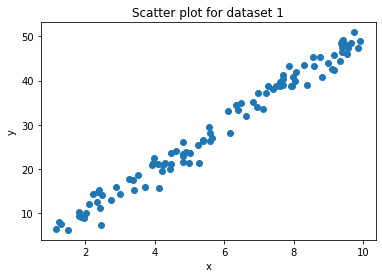

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           4.47e-84
Time:                        15:03:32   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.6

In [554]:
plt.scatter(data1.x,data1.y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Scatter plot for dataset 1')
plt.show()
## Quick scatter plot, linear model is apprporiate for this dataset.
m1 = ols('y ~ x',data1).fit()
print(m1.summary())

# R-Squared is 97.9% of data explained by the model. kurtosis is around 3 which is good. 
# p-value for Intercept is large, larger than 0.05,
# I will train linear model without intercept.



In [555]:
m1 = ols('y ~ x + 0',data1).fit()
print(m1.summary())
# R-Squared is improved to 99.6% of data explained by the model. it is better to fit the model using without intercept 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.794e+04
Date:                Sun, 12 Jul 2020   Prob (F-statistic):                   3.31e-123
Time:                        15:03:32   Log-Likelihood:                         -206.17
No. Observations:                 100   AIC:                                      414.3
Df Residuals:                      99   BIC:                                      416.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

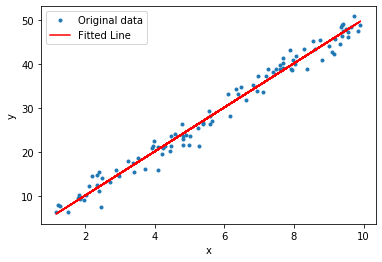

In [556]:
# Plot scatterplot depicting the observations
plt.plot(data1.x,data1.y, 'o', 
         label='Original data', 
         markersize=3)

slope = 5.0184

# Predict y
data1['data1_y_predicted'] = slope * data1.x

# Add regression line
plt.plot(data1.x, data1.data1_y_predicted , 'r-', label='Fitted Line')

# Add legend, set x, y axes labels and show the figure
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()


#The model looks good.

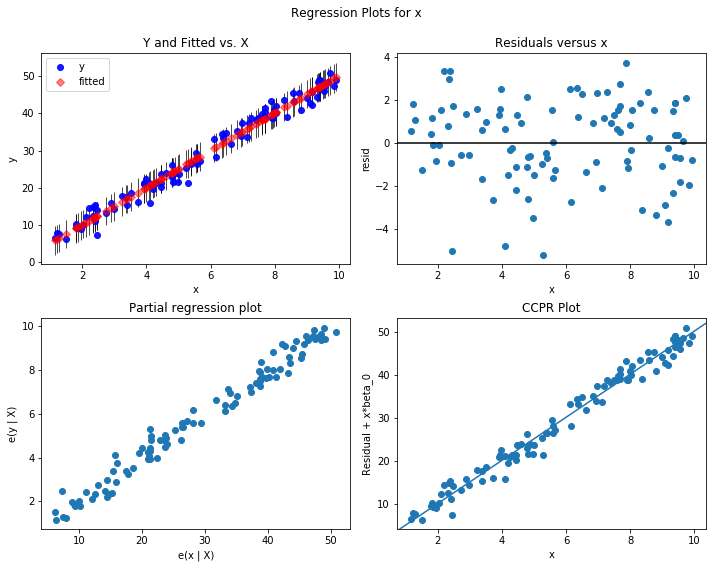

In [595]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(m1, "x", fig = fig)
#On the graph Residuals vs x are not dense, but uniform across whole range.

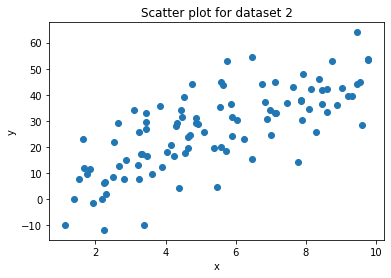

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           6.11e-19
Time:                        15:03:33   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.6

Intercept    1.095552
x            4.777354
dtype: float64

In [557]:
plt.scatter(data2.x,data2.y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Scatter plot for dataset 2')
plt.show()
## Quick scatter plot, linear model is apprporiate for this dataset but variance is s little bit wide. 
### may look at residuals
m2 = ols('y ~ x',data2).fit()
print(m2.summary())
m2.params
# R-Squared is only 55.5% of data explained by the model. kurtosis is around 3 which is good. 
# p-value for Intercept is large, larger than 0.05,
# I will train linear model without intercept.


In [558]:
m2 = ols('y ~ x + 0',data2).fit()
print(m2.summary())
# R-Squared is improved to 88.8% of data explained by the model. it is better to fit the model using without intercept 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              782.6
Date:                Sun, 12 Jul 2020   Prob (F-statistic):                    8.34e-49
Time:                        15:03:33   Log-Likelihood:                         -375.83
No. Observations:                 100   AIC:                                      753.7
Df Residuals:                      99   BIC:                                      756.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [559]:
slope2 = 4.9467

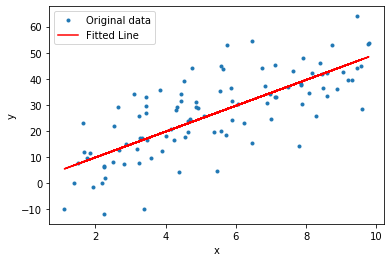

4.9467


In [560]:
# Plot scatterplot depicting the observations
plt.plot(data2.x,data2.y, 'o', 
         label='Original data', 
         markersize=3)



# Predict y
data2['data2_y_predicted'] =    slope2 * data2.x

# Add regression line
plt.plot(data2.x, data2.data2_y_predicted , 'r-', label='Fitted Line')

# Add legend, set x, y axes labels and show the figure
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()


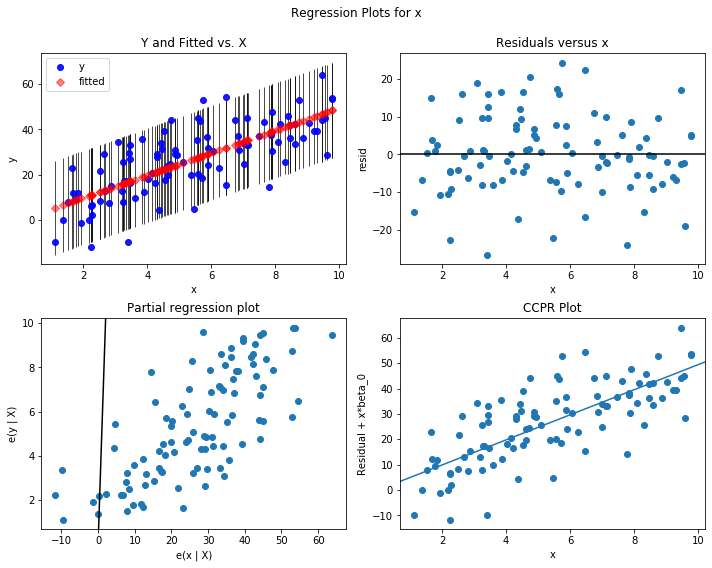

In [587]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(m2, "x", fig = fig)
#On the graph Residuals vs x are not dense, but uniform across whole range.

The model is fitting well and the residuals are approximately normal, so no further transformation is required.

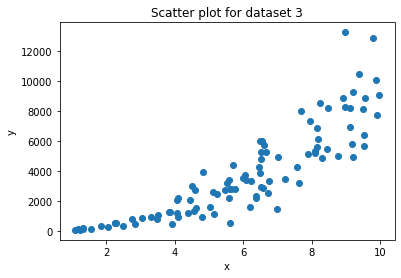

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           1.04e-31
Time:                        15:03:34   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.1748    402.741     -6.546      0.0

Intercept   -2636.174839
x            1081.826591
dtype: float64

In [564]:
plt.scatter(data3.x,data3.Y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Scatter plot for dataset 3')
plt.show()
## Quick scatter plot, linear model is not apprporiate for this dataset. will need transformation
m3 = ols('Y ~ x',data3).fit()
print(m3.summary())

m3.params
##based on summary, R-Squared is not high, only 75.5 % of data explained by the model, kurtosis is too high.
##Model need transformation


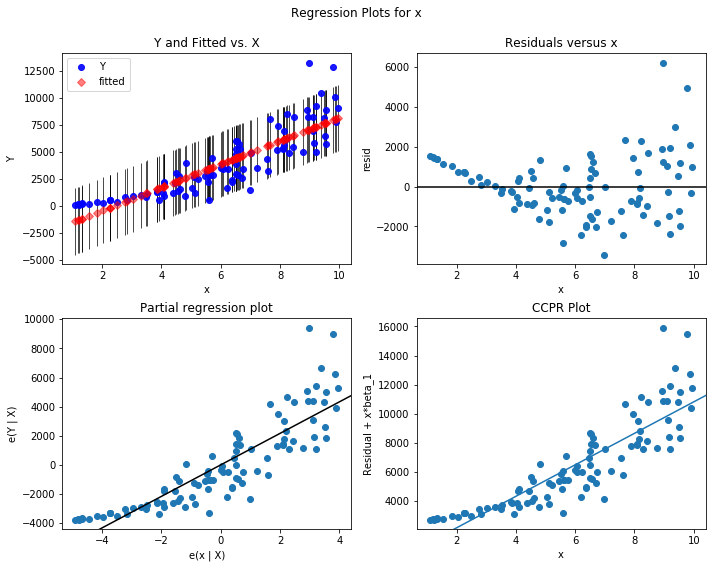

In [565]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(m3, "x", fig = fig)
#On the graph Residuals vs x which is not normal distributed

In [566]:
# apply Box-Cox transformation to 'Count' target variable in order to make it normally distributed

data3['data3_Y'],lambda_value = scipy.stats.boxcox(data3.Y)
lambda_value


0.3963404407119001

In [567]:
data3['data3_transformed']= np.power(data3.Y, 0.4)
Y_bc = data3['data3_transformed']
X_bc = data3['x']
m3_bc = sm.ols(formula='Y_bc ~ X_bc', data=data3).fit()
m3_bc.summary()
## Compare to orginial OLS result, R-Squared increased to 0.867. 86.7% data explained by the model, 
## Kurtosis is 3.6 which is around 3. it is good. AIC and BIC dropped

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Y_bc   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     640.3
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           9.18e-45
Time:                        15:03:35   Log-Likelihood:                -264.71
No. Observations:                 100   AIC:                             533.4
Df Residuals:                      98   BIC:                             538.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2148      0.918      3.501      0.001       1.392       5.037
X_bc           3.5895      0.142     25.304      0.000       3.308       3.871
==============================================================================
Omnibus:                        3.047   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.493
Skew:                          -0.251   Prob(JB):                        0.287
Kurtosis:                       3.588   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

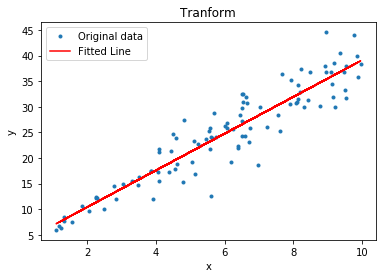

In [568]:
m3_bc.params

# Plot scatterplot depicting the observations
plt.plot(data3.x,data3['data3_transformed'], 'o', 
         label='Original data', 
         markersize=3)

# Extract regression parameters from the model
intercept3_bc, slope3_bc = m3_bc.params

# Predict wife's height
data3['data3_y_transform_predicted'] = intercept3_bc + slope3_bc * data3.x


# Add regression line
plt.plot(data3.x, data3.data3_y_transform_predicted , 'r-', label='Fitted Line')


# Add legend, set x, y axes labels and show the figure
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.title('Tranform')
plt.show()




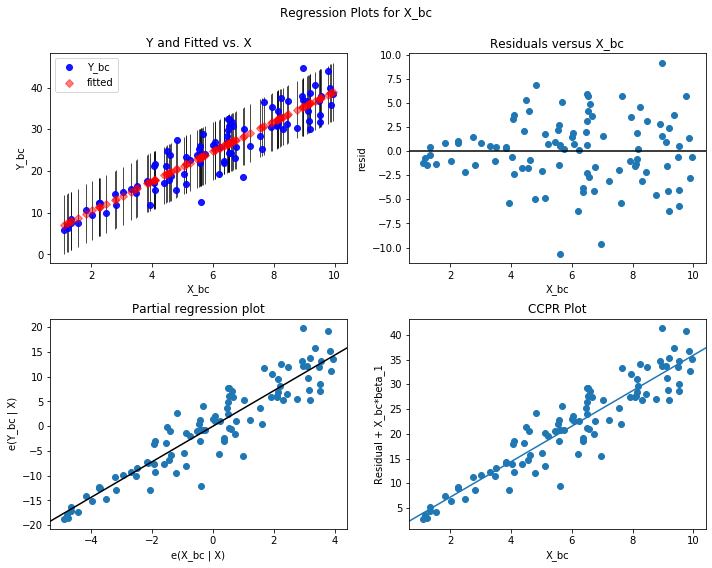

In [569]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(m3_bc, "X_bc", fig = fig)
#On the graph Residuals vs x which is  normally distributed now

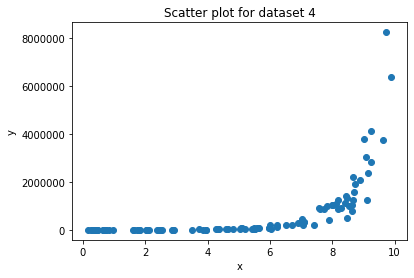

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           8.87e-12
Time:                        15:03:36   Log-Likelihood:                -1526.2
No. Observations:                 100   AIC:                             3056.
Df Residuals:                      98   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.535e+05    2.1e+05     -3.585      0.0

Intercept   -753498.668130
x            270653.490062
dtype: float64

In [570]:
plt.scatter(data4.x,data4.Y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Scatter plot for dataset 4')
plt.show()
## Quick scatter plot, linear model is not apprporiate for this dataset. it is exponential shape.
## will need transformation
m4 = ols('Y ~ x',data4).fit()

print(m4.summary())
m4.params

## R-Squared is low, only 38% of data explained by linear regression model. Kurtosis , AIC, BIC is high
## Recommendation: Need transformation in the model, and review again

In [571]:
data4['data4_Y'],lambda_value = scipy.stats.boxcox(data4.Y)
lambda_value


0.04196708711302993

In [572]:
data4['data4_transformed']= np.power(data4.Y, 0.04)
Y_bc = data4['data4_transformed']
X_bc = data4['x']
m4_bc = sm.ols(formula='Y_bc ~ X_bc', data=data4).fit()
m4_bc.summary()
## Compare to orginial OLS result, R-Squared increased to 0.979. 97.9&% data explained by the model, 
## Kurtosis is 2.8 which is around 3. AIC and BIC dropped.it is good. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Y_bc   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4588.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           4.08e-84
Time:                        15:03:36   Log-Likelihood:                 221.88
No. Observations:                 100   AIC:                            -439.8
Df Residuals:                      98   BIC:                            -434.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2368      0.005    229.922      0.000       1.226       1.247
X_bc           0.0606      0.001     67.735      0.000       0.059       0.062
==============================================================================
Omnibus:                        2.992   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.934
Skew:                          -0.410   Prob(JB):                        0.231
Kurtosis:                       2.825   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

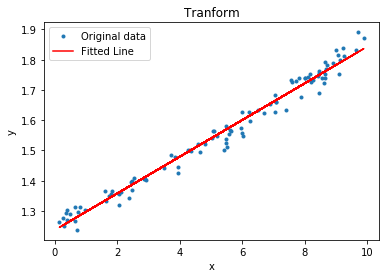

In [573]:
m4_bc.params

# Plot scatterplot depicting the observations
plt.plot(data4.x,data4['data4_transformed'], 'o', 
         label='Original data', 
         markersize=3)

# Extract regression parameters from the model
intercept4, slope4 = m4_bc.params

# Predict wife's height
data4['data4_y_transform_predicted'] = intercept4 + slope4 * data4.x

# Add regression line
plt.plot(data4.x, data4.data4_y_transform_predicted , 'r-', label='Fitted Line')

# Add legend, set x, y axes labels and show the figure
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.title('Tranform')
plt.show()

#Data fit the model

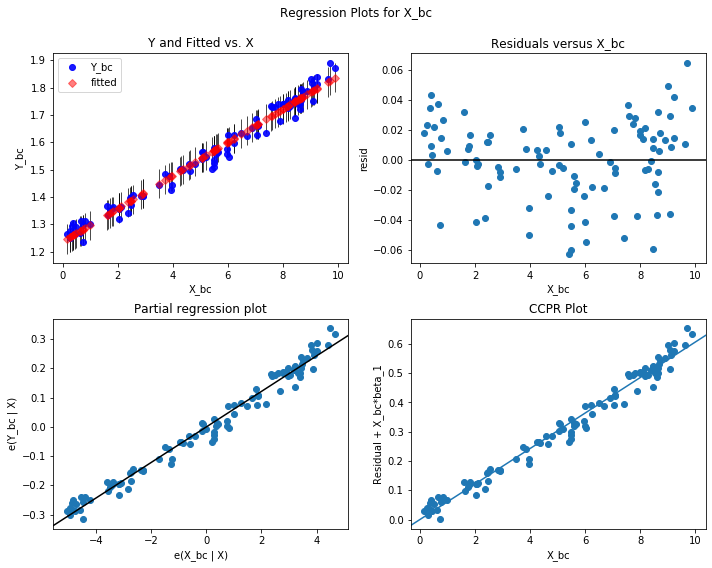

In [589]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(m4_bc, "X_bc", fig = fig)
#On the graph Residuals vs x which is  normally distributed

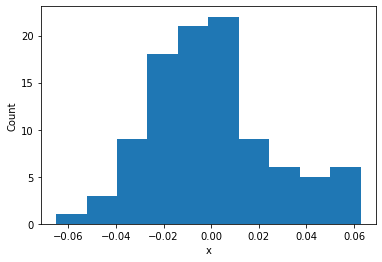

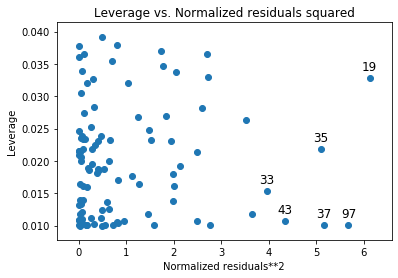

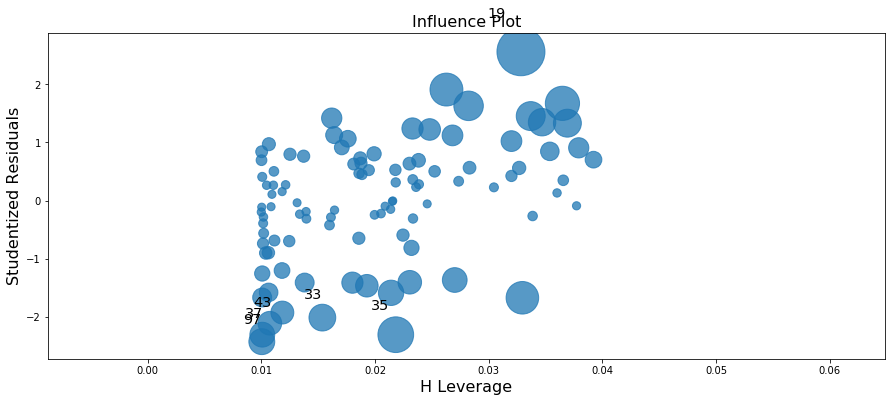

In [594]:
# Calculate the residuals
data4['Residuals'] = data4['data4_y_transform_predicted'] - data4['data4_transformed']

# We will plot the histogram of the residuals first
residuals_hist = plt.hist(data4.Residuals)

# Add axes labels
plt.xlabel('x')
plt.ylabel('Count')


# And we will print the statistical summary of the residuals,
data4['Residuals'].describe()
# Residuals is distributed normally In most of data points. 
# The prediction error ranges mostly from -0.06 to 0.06. Residuals' mean and median are close to zero. 

fig = plot_leverage_resid2(m4_bc, ax=ax)
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(m4_bc, ax=ax)
## Look at the Influence Plot, there is one outlier  which student residual Under -3 and +3.
# Looks good


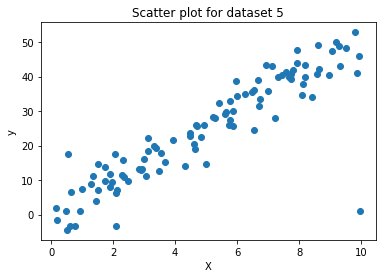

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           4.70e-37
Time:                        15:03:36   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.4

Intercept    0.921257
X            4.767081
dtype: float64

In [574]:
plt.scatter(data5.X, data5.Y)
plt.ylabel('y')
plt.xlabel('X')
plt.title('Scatter plot for dataset 5')
plt.show()
## Quick scatter plot, linear model is apprporiate for this dataset. there is outliers. need to take a look 
## how outlier impact model
m5 = ols('Y ~ X',data5).fit()
print(m5.summary())
m5.params



## R-Square: 80.6% data explained by data, Kurtosis is quite high. we may need to remove the outlier and review again.
# p-value for Intercept is large, larger than 0.05,
# I will train linear model without intercept.

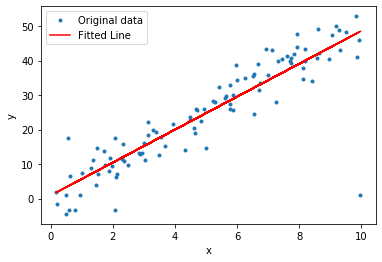

In [575]:
m5.params

# Plot scatterplot depicting the observations
plt.plot(data5.X,data5['Y'], 'o', 
         label='Original data', 
         markersize=3)

# Extract regression parameters from the model
intercept5, slope5 = m5.params

# Predict wife's height
data5['data5_y_predicted'] = intercept5 + slope5 * data5.X

# Add regression line
plt.plot(data5.X, data5.data5_y_predicted , 'r-', label='Fitted Line')

# Add legend, set x, y axes labels and show the figure
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
#plt.title('Tranform')
plt.show()
#there is one outlier falls x is round 10 but y is between 0 and 1,not fit into the model. need analysis on residual

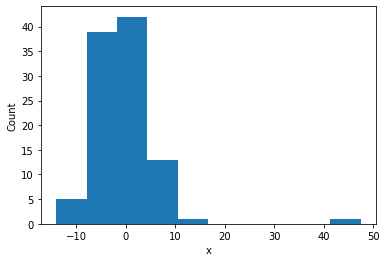

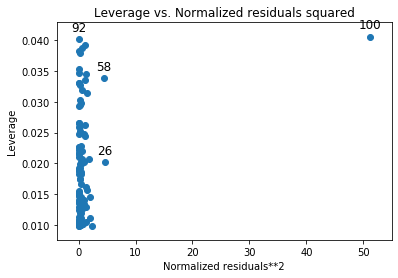

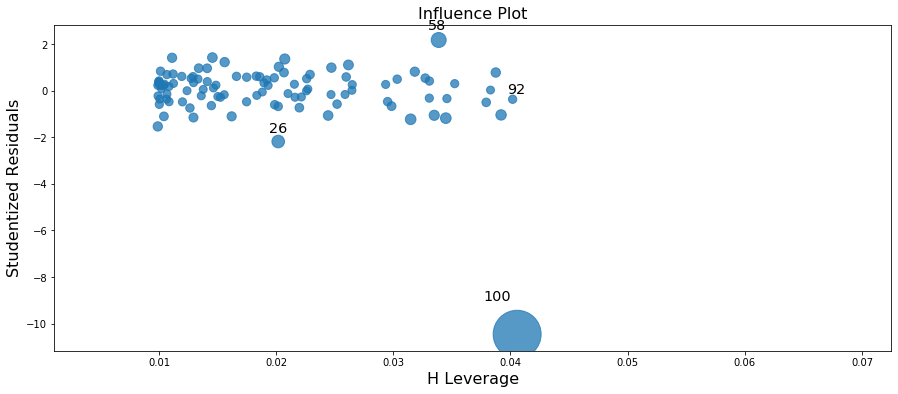

In [576]:
# Calculate the residuals
data5['Residuals'] = data5['data5_y_predicted'] - data5['Y']

# We will plot the histogram of the residuals first
residuals_hist = plt.hist(data5.Residuals)

# Add axes labels
plt.xlabel('x')
plt.ylabel('Count')


# And we will print the statistical summary of the residuals,
# i.e. (median, mean, quartiles, etc.)
data5['Residuals'].describe()
# Residuals seem to be distributed normally In most of data points. 
# The prediction error ranges mostly from -15, to 15. Residuals' mean and median are close to zero. 
# There is an outlier falls on the far right,x is greater than 40, which impact the model. we will delete this outlier

fig = plot_leverage_resid2(m5, ax=ax)
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(m5, ax=ax)
## Love at the Influence Plot, there is one outlier  which student residual beyond -3. it does impact the model
## make decision to delete it


In [577]:
get_outlier=data5[(data5['Y']<2) & (data5['X']>=9)]

##Drop Outlier
data5.drop(data5[(data5['Y']<2) & (data5['X']>=9)].index, inplace=True)


In [578]:

#Fit the model again after dropping the outlier
m5_re = ols('Y ~ X',data5).fit()
print(m5_re.summary())
m5_re.params
# R-Squared improved to 90.6% of data explained in the model
# Kurtosis is dropped to 3.75 from 26.7. AIC and BIC dropped as well. Model is good now
# p-value for intercept is large, larger than 0.05. need to drop it from model and fit the model again

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     945.8
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           3.84e-52
Time:                        15:03:37   Log-Likelihood:                -294.13
No. Observations:                 100   AIC:                             592.3
Df Residuals:                      98   BIC:                             597.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0993      0.935     -0.106      0.9

Intercept   -0.099290
X            5.070538
dtype: float64

In [579]:
m5_re = ols('Y ~ X + 0',data5).fit()
print(m5_re.summary())
# R-Squared is improved to 97.5% of data explained by the model. it is better to fit the model using without intercept

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              3872.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):                    3.52e-81
Time:                        15:03:37   Log-Likelihood:                         -294.13
No. Observations:                 100   AIC:                                      590.3
Df Residuals:                      99   BIC:                                      592.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [580]:
slope5_re=5.0553

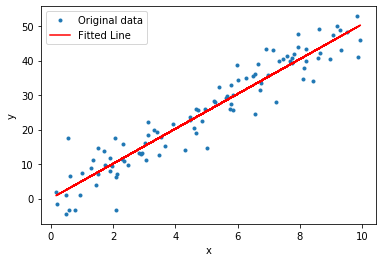

In [581]:
# Plot scatterplot depicting the observations
plt.plot(data5.X,data5['Y'], 'o', 
         label='Original data', 
         markersize=3)

# Predict wife's height
data5['data5_y_predicted_re'] = slope5_re * data5.X #intercept5_re + 

# Add regression line
plt.plot(data5.X, data5.data5_y_predicted_re , 'r-', label='Fitted Line')

# Add legend, set x, y axes labels and show the figure
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
#plt.title('Tranform')
plt.show()

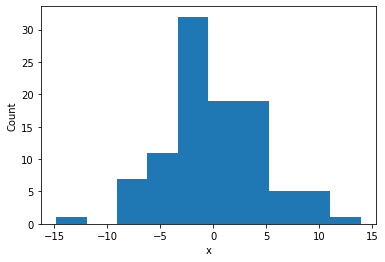

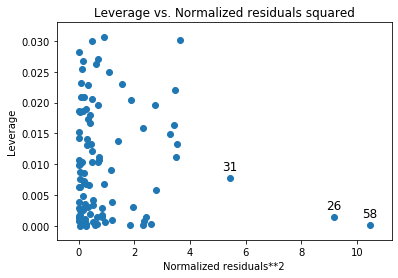

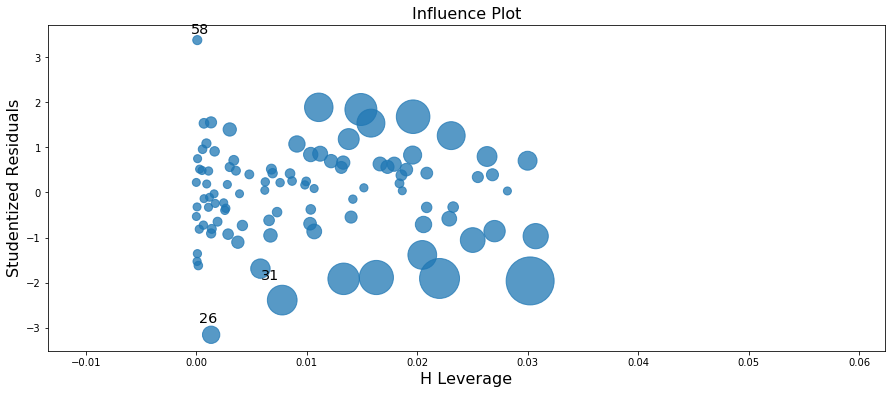

In [590]:
# Calculate the residuals
data5['Residuals'] = data5['data5_y_predicted_re'] - data5['Y']

# We will plot the histogram of the residuals first
residuals_hist = plt.hist(data5.Residuals)

# Add axes labels
plt.xlabel('x')
plt.ylabel('Count')


# And we will print the statistical summary of the residuals,

data5['Residuals'].describe()
# Residuals is distributed normally In most of data points. 
# The prediction error ranges mostly from -15, to 15. Residuals' mean and median are close to zero. 


fig = plot_leverage_resid2(m5_re, ax=ax)
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(m5_re, ax=ax)


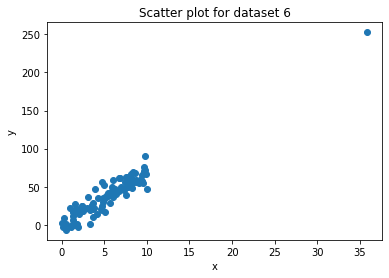

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           2.49e-54
Time:                        15:03:38   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3059      1.534     -0.199      0.8

In [582]:
plt.scatter(data6.x,data6.y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Scatter plot for dataset 6')
plt.show()
## Quick scatter plot, linear model is apprporiate for this dataset. there is outliers. need to take a look 
## how outlier impact model
m6 = ols('y ~ x',data6).fit()
print(m6.summary())

## R-Squared have 91.3% of data explained by model, kurtosis is around 3
## There is a outlier in the far right, need further analysis if it impact model
# p-value for intercept is large, larger than 0.05. need to drop it from model and fit the model again

In [583]:
m6 = ols('y ~ x + 0',data6).fit()
print(m6.summary())
# R-Squared is improved to 96.6% of data explained by the model. it is better to fit the model using without intercept

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              2861.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):                    2.17e-75
Time:                        15:03:38   Log-Likelihood:                         -367.54
No. Observations:                 101   AIC:                                      737.1
Df Residuals:                     100   BIC:                                      739.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [584]:
slope6 = 6.9926

In [585]:
# Predict y
data6['data6_y_predicted'] =  6.9926 * data6.x #intercept6 +
data6['data6_y_predicted'] 

0        7.894645
1       48.318866
2       54.803803
3        0.933512
4       64.629106
          ...    
96      60.952396
97      67.244338
98      12.220967
99      58.658124
100    250.219003
Name: data6_y_predicted, Length: 101, dtype: float64

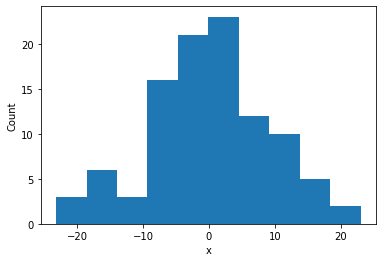

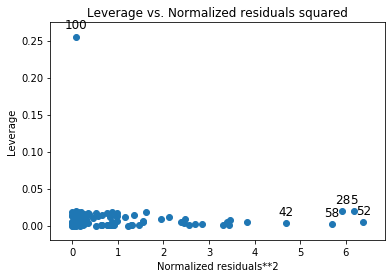

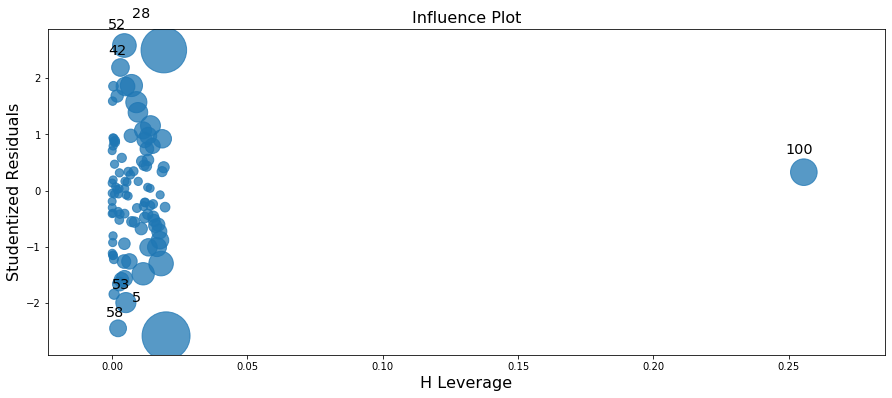

In [586]:
# Calculate the residuals
data6['Residuals'] = data6['data6_y_predicted'] - data6['y']

# We will plot the histogram of the residuals first
residuals_hist = plt.hist(data6.Residuals)

# Add axes labels
plt.xlabel('x')
plt.ylabel('Count')


# And we will print the statistical summary of the residuals,
# i.e. (median, mean, quartiles, etc.)
data6['Residuals'].describe()
# Residuals seem to be distributed normally In most of data points. 
# The prediction error ranges mostly from -25, to 25. Residuals' mean and median are close to zero. 

fig = plot_leverage_resid2(m6, ax=ax)
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(m6, ax=ax)
## Look at Influence plot, there is one outlier , it is falls within -3 and +3 Studentized residual
## so it is not impact the model. as we see in fit graph. it is falls in the fit line